### Imports

In [1]:
%matplotlib inline

import numpy as np #numerical functions
import pandas as pd #data manipulation framework
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting as well
import matplotlib.patches as mpatches #for legends
import mca #Multiple Component Analysis

import warnings #disable annoying warnings in notebook
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### DataFrame original

In [2]:
df = pd.read_excel('DNA - Base_.xlsx')
df = df.drop(df.index[0])

df.head(5)

,respondent_id,collector_id,date_created,date_modified,Sexo,Idade,Tempo de Ultracargo (anos),Cargo,Quando chego ao trabalho com meu guarda-chuva molhado deixo ele aberto para secar em um canto no corredor.,Tenho hábito de realizar buscas ou ler mensagens no celular enquanto caminho.,Tenho o hábito de utilizar o corrimão ao subir e descer as escadas .,Tenho o hábito de utilizar o elevador mesmo que se for apenas um andar caso esteja carregando notebook e/ou demais acessórios para uma reunião.,Se ao utilizar o bebedouro eu derrubo água imediatamente eu busco papel para enxugar ou aciono a equipe de limpeza.,"Quando vejo o chão molhado à frente do bebedouro, independentemente de ser eu o autor do fato, eu enxugo ou aciono a equipe de limpeza.",Quando frequento o restaurante no Ultra utilizo a saída próxima a entrega das bandejas.,Sempre que preciso atravessar a Brigadeiro utilizo a faixa de pedestres.,Quando estou no banco traseiro tenho o hábito de colocar o cinto de segurança e se sou o condutor também solicito que os passageiros utilizem o cinto no banco traseiro.,Quando estou dirigindo eu leio e/ou envio mensagem no celular.,Quando vejo uma pessoa no escritório fazendo uma atitude que julgo insegura eu o abordo e lhe dou orientações?,Eu faço a ginástica laboral ou exercícios de alongamentoEu faço a ginástica laboral ou exercícios de alongamento.
1,1.047518e+10,221639662.0,2019-01-18 10:00:35,2019-01-18 10:03:20,Feminino,29,2,Analista / Técnico / Auxiliar,Interdependente,Reativo,Independente,Interdependente,Dependente,Dependente,Reativo,Reativo,Reativo,Independente,Reativo,Dependente
2,1.047513e+10,221639662.0,2019-01-18 09:24:02,2019-01-18 09:25:26,Masculino,29,1,Analista / Técnico / Auxiliar,Interdependente,Dependente,Dependente,Reativo,Interdependente,Interdependente,Interdependente,Independente,Interdependente,Independente,Reativo,Independente
3,1.047282e+10,221639662.0,2019-01-16 18:12:41,2019-01-17 11:03:13,Feminino,30,2,Analista / Técnico / Auxiliar,Interdependente,Reativo,Reativo,Interdependente,Interdependente,Dependente,Interdependente,Reativo,Dependente,Independente,Dependente,Dependente
4,1.047081e+10,221639662.0,2019-01-16 15:30:29,2019-01-16 15:35:42,Feminino,18,1,Analista / Técnico / Auxiliar,Interdependente,Dependente,Independente,Reativo,Interdependente,Independente,Reativo,Dependente,Interdependente,Não se aplica (não dirijo),Reativo,Independente
5,1.047039e+10,221639662.0,2019-01-16 13:09:49,2019-01-16 13:14:55,Feminino,28,4,Analista / Técnico / Auxiliar,Interdependente,Reativo,Independente,Reativo,Interdependente,Interdependente,Reativo,Reativo,Dependente,Não se aplica (não dirijo),Dependente,Independente


### Renomeando as colunas

In [3]:
new_cols = ['Guarda-Chuva',
       'CelularCaminhando',
       'Corrimao',
       'Elevador',
       'Bebedouro', 
       'ChaoMolhado',
       'Restaurante',
       'FaixaPedestre',
       'CintoSeguranca',
       'CelularDirigindo',
       'AtitudeEscritorio',
       'GinasticaLaboral']

for i in range(0,len(new_cols)):
    df.rename(columns={df.columns[8+i]: new_cols[i]}, inplace=True)

df.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'Sexo', 'Idade', 'Tempo de Ultracargo (anos)', 'Cargo', 'Guarda-Chuva',
       'CelularCaminhando', 'Corrimao', 'Elevador', 'Bebedouro', 'ChaoMolhado',
       'Restaurante', 'FaixaPedestre', 'CintoSeguranca', 'CelularDirigindo',
       'AtitudeEscritorio', 'GinasticaLaboral'],
      dtype='object')

### Distribuições

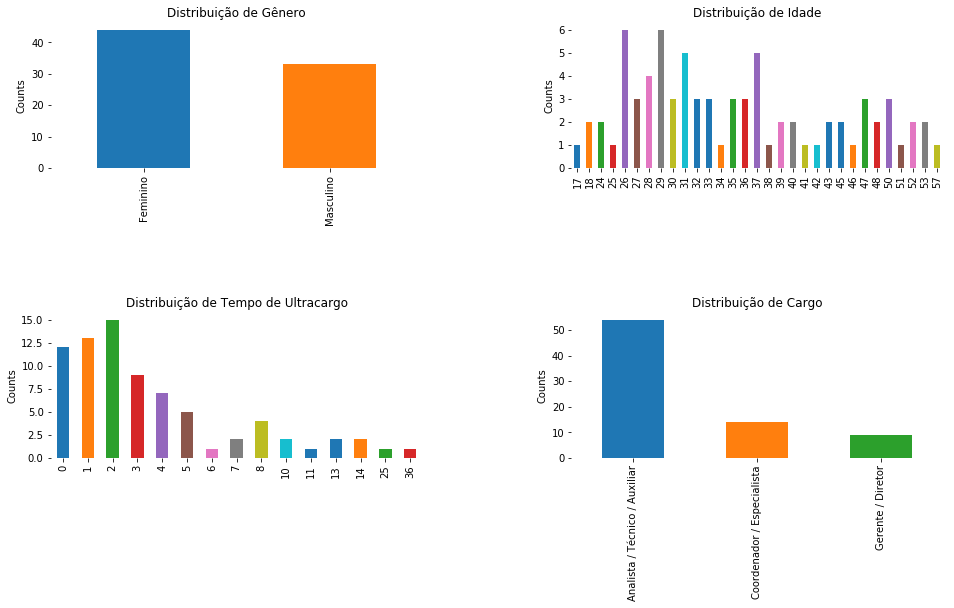

In [4]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 8))

df['Sexo'].value_counts().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Distribuição de Gênero')
df['Idade'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Distribuição de Idade')
df['Tempo de Ultracargo (anos)'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Distribuição de Tempo de Ultracargo')
df['Cargo'].value_counts().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('Distribuição de Cargo')

for i in range(2):
    for j in range(2):
        axarr[i][j].set_ylabel('Counts')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

### Distribuições das Respostas

In [34]:
pd.Series.plot(
    #ax=axarr[0][0],
    df['Guarda-Chuva'].value_counts().reindex(order).fillna(0), 
   # kind='bar', 
   # color=my_colors
)


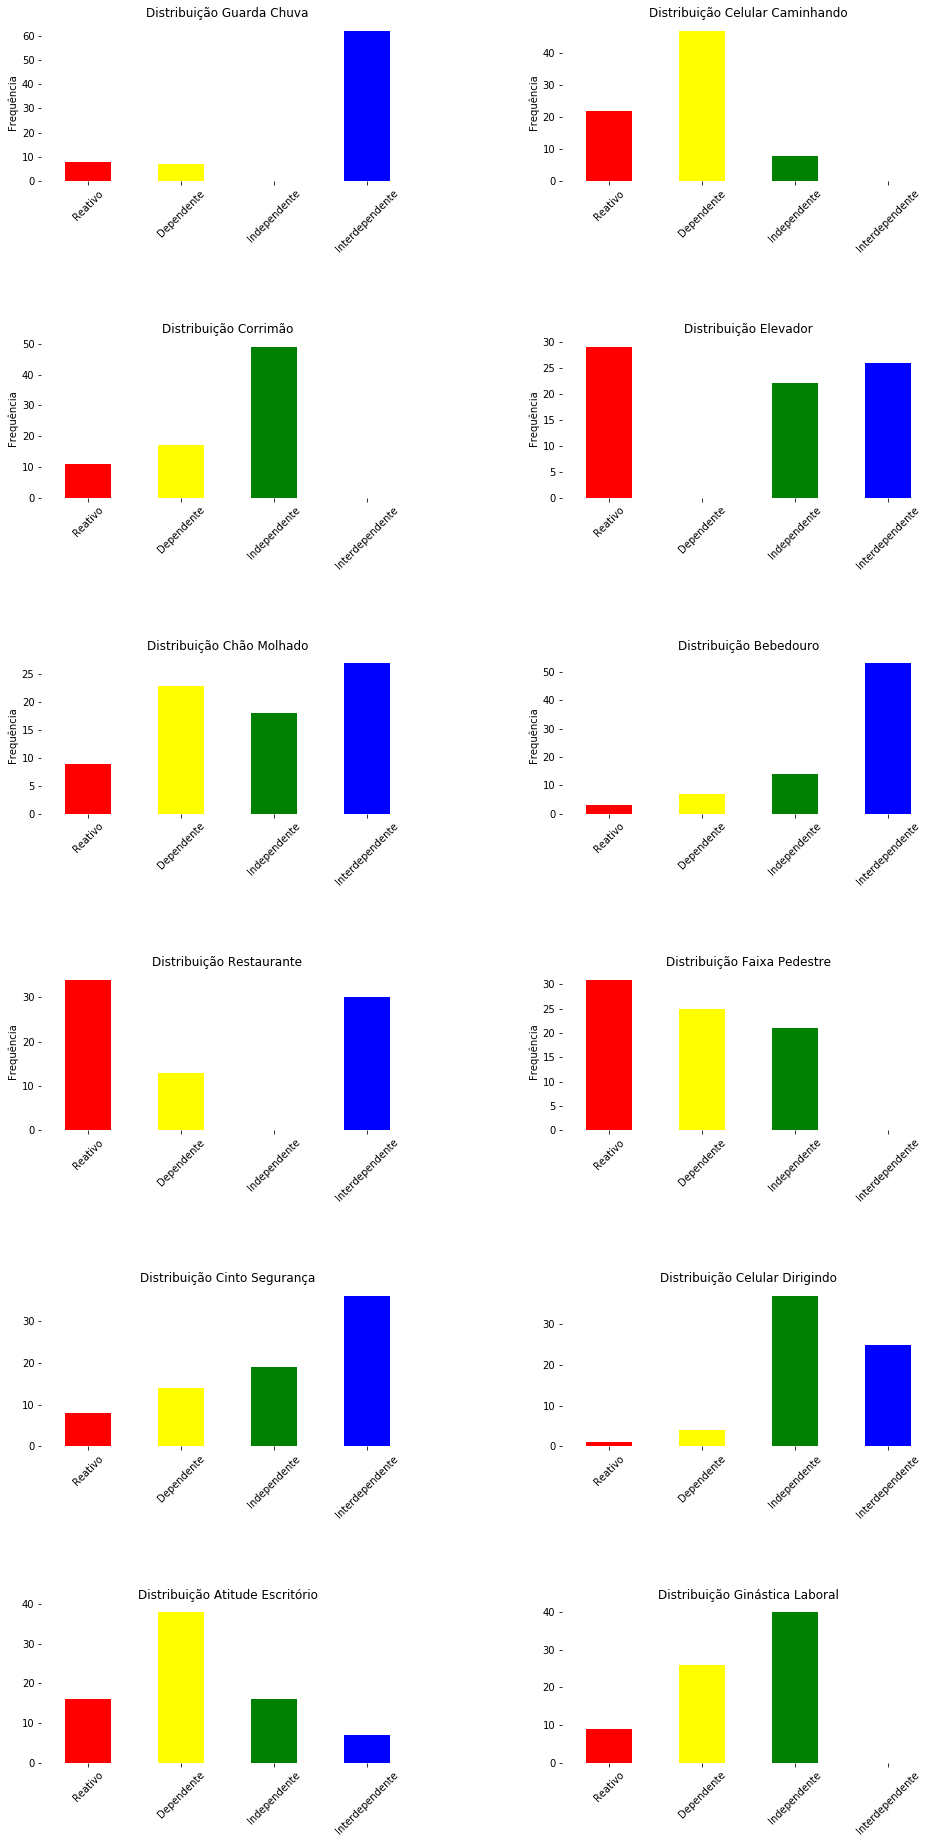

In [48]:
order = ['Reativo', 'Dependente', 'Independente', 'Interdependente']
my_colors = ['r', 'yellow', 'g', 'b'] # red, yellow, green, blue

fig, axarr = plt.subplots(6, 2, figsize=(16, 32))

df['Guarda-Chuva'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[0][0], color=my_colors)
axarr[0][0].set_title('Distribuição Guarda Chuva')
axarr[0][0].tick_params(axis='x', rotation=45)
df['CelularCaminhando'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[0][1], color=my_colors)
axarr[0][1].set_title('Distribuição Celular Caminhando')
axarr[0][1].tick_params(axis='x', rotation=45)
df['Corrimao'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[1][0], color=my_colors)
axarr[1][0].set_title('Distribuição Corrimão')
axarr[1][0].tick_params(axis='x', rotation=45)
df['Elevador'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[1][1], color=my_colors)
axarr[1][1].set_title('Distribuição Elevador')
axarr[1][1].tick_params(axis='x', rotation=45)
df['ChaoMolhado'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[2][0], color=my_colors)
axarr[2][0].set_title('Distribuição Chão Molhado')
axarr[2][0].tick_params(axis='x', rotation=45)
df['Bebedouro'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[2][1], color=my_colors)
axarr[2][1].set_title('Distribuição Bebedouro')
axarr[2][1].tick_params(axis='x', rotation=45)
df['Restaurante'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[3][0], color=my_colors)
axarr[3][0].set_title('Distribuição Restaurante')
axarr[3][0].tick_params(axis='x', rotation=45)
df['FaixaPedestre'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[3][1], color=my_colors)
axarr[3][1].set_title('Distribuição Faixa Pedestre')
axarr[3][1].tick_params(axis='x', rotation=45)
df['CintoSeguranca'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[4][0], color=my_colors)
axarr[4][0].set_title('Distribuição Cinto Segurança')
axarr[4][0].tick_params(axis='x', rotation=45)
df['CelularDirigindo'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[4][1], color=my_colors)
axarr[4][1].set_title('Distribuição Celular Dirigindo')
axarr[4][1].tick_params(axis='x', rotation=45)
df['AtitudeEscritorio'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[5][0], color=my_colors)
axarr[5][0].set_title('Distribuição Atitude Escritório')
axarr[5][0].tick_params(axis='x', rotation=45)
df['GinasticaLaboral'].value_counts().reindex(order).fillna(0).plot.bar(ax=axarr[5][1], color=my_colors)
axarr[5][1].set_title('Distribuição Ginástica Laboral')
axarr[5][1].tick_params(axis='x', rotation=45)

for i in range(4):
    for j in range(2):
        axarr[i][j].set_ylabel('Frequência')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

### Conversão Reativo/Dependente/Independente/Interdependente p/ escala numérica

In [6]:
def risk_converter(row):
    if row == 'Reativo':
        row = 1
    elif row == 'Dependente':
        row = 2
    elif row == 'Independente':
        row = 3
    elif row == 'Interdependente':
        row = 4
    else:
        row = None
    return row
        
for col in df.columns[8:]:
    df[col] = df[col].apply(risk_converter)
    
df.head(10)

,respondent_id,collector_id,date_created,date_modified,Sexo,Idade,Tempo de Ultracargo (anos),Cargo,Guarda-Chuva,CelularCaminhando,Corrimao,Elevador,Bebedouro,ChaoMolhado,Restaurante,FaixaPedestre,CintoSeguranca,CelularDirigindo,AtitudeEscritorio,GinasticaLaboral
1,1.047518e+10,221639662.0,2019-01-18 10:00:35,2019-01-18 10:03:20,Feminino,29,2,Analista / Técnico / Auxiliar,4,1,3,4,2,2,1,1,1,3.0,1,2.0
2,1.047513e+10,221639662.0,2019-01-18 09:24:02,2019-01-18 09:25:26,Masculino,29,1,Analista / Técnico / Auxiliar,4,2,2,1,4,4,4,3,4,3.0,1,3.0
3,1.047282e+10,221639662.0,2019-01-16 18:12:41,2019-01-17 11:03:13,Feminino,30,2,Analista / Técnico / Auxiliar,4,1,1,4,4,2,4,1,2,3.0,2,2.0
4,1.047081e+10,221639662.0,2019-01-16 15:30:29,2019-01-16 15:35:42,Feminino,18,1,Analista / Técnico / Auxiliar,4,2,3,1,4,3,1,2,4,NaN,1,3.0
5,1.047039e+10,221639662.0,2019-01-16 13:09:49,2019-01-16 13:14:55,Feminino,28,4,Analista / Técnico / Auxiliar,4,1,3,1,4,4,1,1,2,NaN,2,3.0
6,1.047002e+10,221639662.0,2019-01-16 09:54:03,2019-01-16 10:48:16,Feminino,37,1,Gerente / Diretor,4,2,3,4,2,2,4,3,3,4.0,3,3.0
7,1.046996e+10,221639662.0,2019-01-16 10:16:40,2019-01-16 10:18:49,Masculino,28,0,Analista / Técnico / Auxiliar,4,1,1,1,2,1,4,3,1,4.0,1,1.0
8,1.046996e+10,221639662.0,2019-01-16 10:13:28,2019-01-16 10:18:01,Feminino,31,2,Analista / Técnico / Auxiliar,4,2,1,4,2,2,1,2,1,3.0,1,2.0
9,1.046988e+10,221639662.0,2019-01-16 09:30:36,2019-01-16 09:32:36,Feminino,35,0,Analista / Técnico / Auxiliar,1,1,1,4,4,2,1,2,3,2.0,2,3.0
10,1.046831e+10,221639662.0,2019-01-15 18:29:15,2019-01-15 18:30:55,Feminino,26,2,Analista / Técnico / Auxiliar,4,2,3,1,4,2,1,2,4,4.0,2,3.0


### Agregando Idade e Tempo de Ultracargo

In [7]:
def age_converter(row):
    if row >= 17 and row <= 26:
        row = 'Entre 17 e 26'
    elif row >= 27 and row <= 35:
        row = 'Entre 27 e 35'
    elif row >= 36 and row <= 45:
        row = 'Entre 36 e 45'
    elif row > 45:
        row = 'Mais de 45'
    else:
        row = None
    return row

def company_time_converter(row):
    if row == 0 or row == 1:
        row = 'Até 1 ano'
    elif row >= 2 and row <= 5:
        row = 'De 2 a 5 anos'
    elif row > 5:
        row = 'Mais de 5 anos'
    else:
        row = None
    return row
        

df['Idade'] = df['Idade'].apply(age_converter)
df['Tempo de Ultracargo (anos)'] = df['Tempo de Ultracargo (anos)'].apply(company_time_converter)
    
df.head(5)

,respondent_id,collector_id,date_created,date_modified,Sexo,Idade,Tempo de Ultracargo (anos),Cargo,Guarda-Chuva,CelularCaminhando,Corrimao,Elevador,Bebedouro,ChaoMolhado,Restaurante,FaixaPedestre,CintoSeguranca,CelularDirigindo,AtitudeEscritorio,GinasticaLaboral
1,1.047518e+10,221639662.0,2019-01-18 10:00:35,2019-01-18 10:03:20,Feminino,Entre 27 e 35,De 2 a 5 anos,Analista / Técnico / Auxiliar,4,1,3,4,2,2,1,1,1,3.0,1,2.0
2,1.047513e+10,221639662.0,2019-01-18 09:24:02,2019-01-18 09:25:26,Masculino,Entre 27 e 35,Até 1 ano,Analista / Técnico / Auxiliar,4,2,2,1,4,4,4,3,4,3.0,1,3.0
3,1.047282e+10,221639662.0,2019-01-16 18:12:41,2019-01-17 11:03:13,Feminino,Entre 27 e 35,De 2 a 5 anos,Analista / Técnico / Auxiliar,4,1,1,4,4,2,4,1,2,3.0,2,2.0
4,1.047081e+10,221639662.0,2019-01-16 15:30:29,2019-01-16 15:35:42,Feminino,Entre 17 e 26,Até 1 ano,Analista / Técnico / Auxiliar,4,2,3,1,4,3,1,2,4,NaN,1,3.0
5,1.047039e+10,221639662.0,2019-01-16 13:09:49,2019-01-16 13:14:55,Feminino,Entre 27 e 35,De 2 a 5 anos,Analista / Técnico / Auxiliar,4,1,3,1,4,4,1,1,2,NaN,2,3.0


### Novas Distribuições

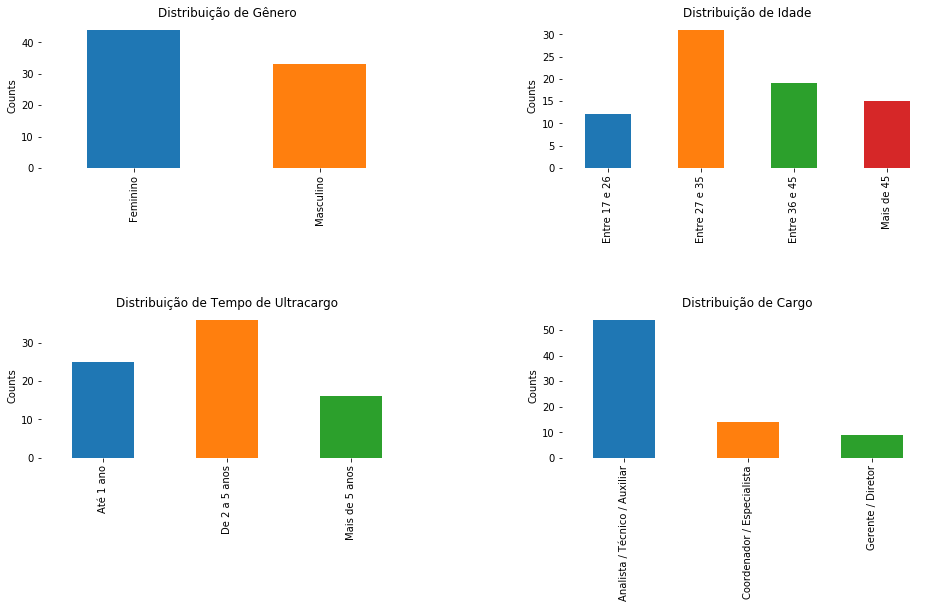

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 8))

df['Sexo'].value_counts().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title('Distribuição de Gênero')
df['Idade'].value_counts().sort_index().plot.bar(ax=axarr[0][1])
axarr[0][1].set_title('Distribuição de Idade')
df['Tempo de Ultracargo (anos)'].value_counts().sort_index().plot.bar(ax=axarr[1][0])
axarr[1][0].set_title('Distribuição de Tempo de Ultracargo')
df['Cargo'].value_counts().plot.bar(ax=axarr[1][1])
axarr[1][1].set_title('Distribuição de Cargo')

for i in range(2):
    for j in range(2):
        axarr[i][j].set_ylabel('Counts')

plt.subplots_adjust(hspace=1, wspace=.4)
sns.despine(bottom=True, left=True)

### Desempenho Geral

In [9]:
print("Desempenho Geral = {:.1f}".format(np.nanmean(df[df.columns[8:]].values)*2.5))

Desempenho Geral = 6.6


In [10]:
df['Geral'] = np.nanmean(df[df.columns[8:]], axis=1)*2.5

df.Geral.head(10)

1     5.208333
2     7.291667
3     6.250000
4     6.363636
5     5.909091
6     7.708333
7     5.000000
8     5.208333
9     5.416667
10    6.666667
Name: Geral, dtype: float64

### Distribuição dos Desempenhos

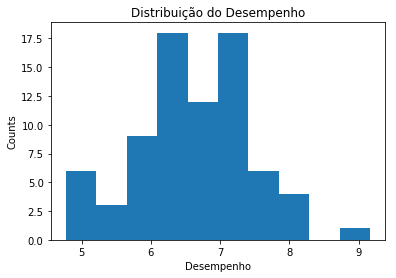

In [11]:
plt.hist(df.Geral)
plt.title('Distribuição do Desempenho')
plt.ylabel('Counts')
plt.xlabel('Desempenho')
plt.show()

In [12]:
df.Geral.describe()

count    77.000000
mean      6.627066
std       0.815258
min       4.772727
25%       6.250000
50%       6.666667
75%       7.083333
max       9.166667
Name: Geral, dtype: float64

### Desempenho por Questão

In [13]:
aux_val = []

for col in df[df.columns[8:-1]]:
    aux_val.append(round(np.nanmean(df[col])*2.5,2))
    
colss = df.columns[8:-1].tolist()  

d = {'Questão': colss, 'Desempenho Médio': aux_val}

des_df = pd.DataFrame(d).set_index('Questão')

des_df.sort_values(by='Desempenho Médio', ascending=False)

,Desempenho Médio
Questão,
Bebedouro,8.80
Guarda-Chuva,8.77
CelularDirigindo,8.21
CintoSeguranca,7.69
ChaoMolhado,7.05
Elevador,6.46
Corrimao,6.23
GinasticaLaboral,6.03
Restaurante,5.84


## Correlação entre as Questões

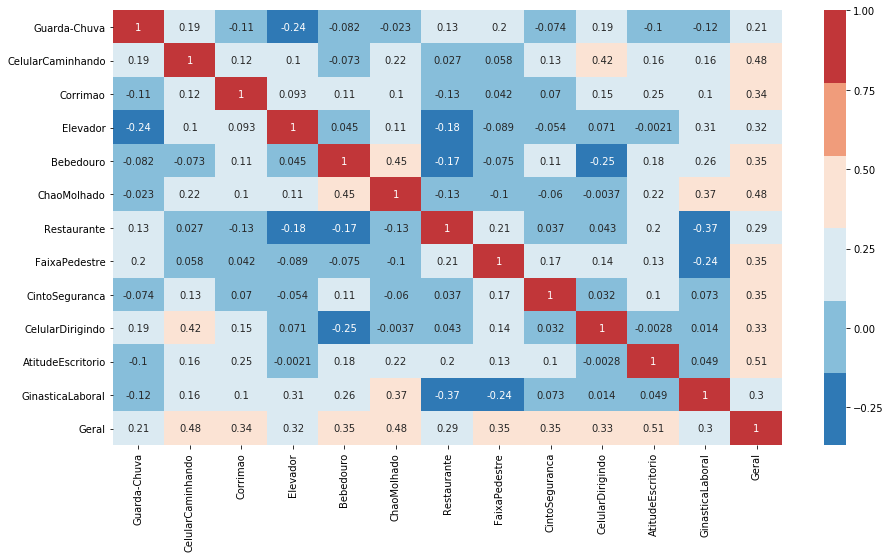

In [14]:
corr = df[df.columns[8:]].corr()

plt.figure(figsize=(15,8))

cmap = sns.color_palette('RdBu_r')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, annot=True)

plt.show()

## Matrizes de Médias

### Gênero

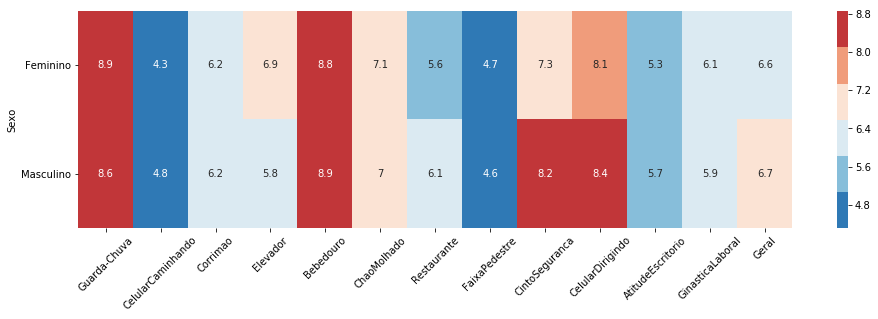

In [15]:
df_gen = df.drop(['respondent_id', 'collector_id', 'date_created', 'date_modified',
                  'Tempo de Ultracargo (anos)', 'Cargo', 'Idade'], axis=1)

corr_gen = df_gen.groupby(by='Sexo').agg(lambda x: np.nanmean(x)*2.5)
corr_gen['Geral'] = corr_gen['Geral']/2.5

plt.figure(figsize=(16,4))

cmap = sns.color_palette('RdBu_r')

sns.heatmap(corr_gen, xticklabels=corr_gen.columns, yticklabels=corr_gen.index, cmap=cmap, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 

plt.show()

### Idade

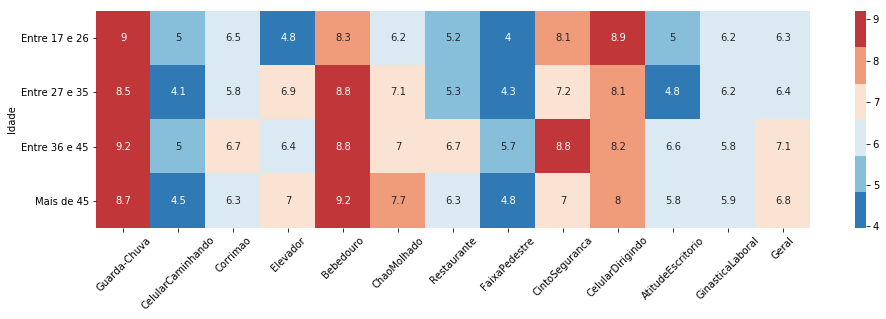

In [16]:
df_age = df.drop(['respondent_id', 'collector_id', 'date_created', 'date_modified',
                  'Tempo de Ultracargo (anos)', 'Cargo', 'Sexo'], axis=1)

corr_age = df_age.groupby(by='Idade').agg(lambda x: np.nanmean(x)*2.5)
corr_age['Geral'] = corr_age['Geral']/2.5

plt.figure(figsize=(16,4))

cmap = sns.color_palette('RdBu_r')

sns.heatmap(corr_age, xticklabels=corr_age.columns, yticklabels=corr_age.index, cmap=cmap, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 

plt.show()

### Tempo de Ultracargo

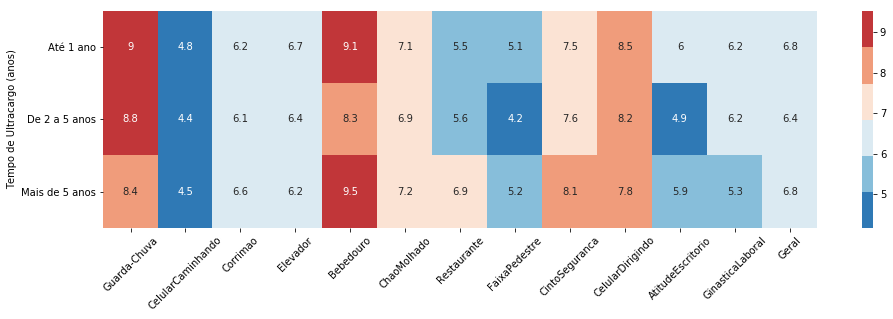

In [17]:
df_tmp = df.drop(['respondent_id', 'collector_id', 'date_created', 'date_modified',
                  'Idade', 'Cargo', 'Sexo'], axis=1)

corr_tmp = df_tmp.groupby(by='Tempo de Ultracargo (anos)').agg(lambda x: np.nanmean(x)*2.5)
corr_tmp['Geral'] = corr_tmp['Geral']/2.5

plt.figure(figsize=(16,4))

cmap = sns.color_palette('RdBu_r')

sns.heatmap(corr_tmp, xticklabels=corr_tmp.columns, yticklabels=corr_tmp.index, cmap=cmap, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 

plt.show()

### Cargo

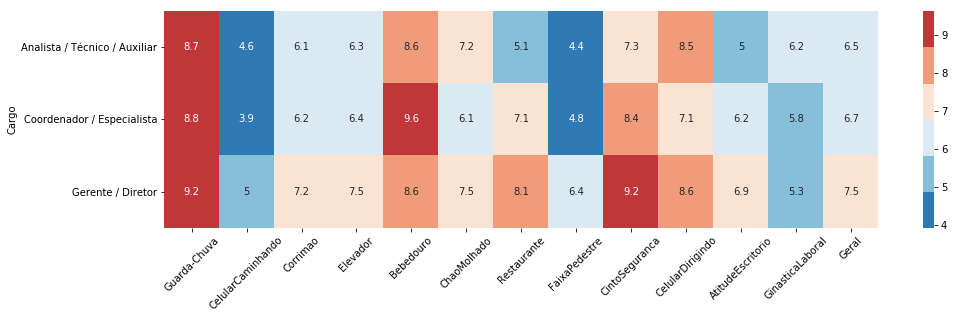

In [18]:
df_cargo = df.drop(['respondent_id', 'collector_id', 'date_created', 'date_modified',
                  'Tempo de Ultracargo (anos)', 'Idade', 'Sexo'], axis=1)

corr_cargo = df_cargo.groupby(by='Cargo').agg(lambda x: np.nanmean(x)*2.5)
corr_cargo['Geral'] = corr_cargo['Geral']/2.5

plt.figure(figsize=(16,4))

cmap = sns.color_palette('RdBu_r')

sns.heatmap(corr_cargo, xticklabels=corr_cargo.columns, yticklabels=corr_cargo.index, cmap=cmap, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=45) 

plt.show()

## MCA

In [19]:
def risk_deconverter(row):
    if row <2.5:
        row = 'Reativo'
    elif row >=2.5 and row < 2.8:
        row = 'Dependente'
    elif row >= 2.8 and row <=3.1 :
        row = 'Independente'
    elif row > 3.1:
        row = 'Interdependente'
    else:
        row = None
    return row


df_mca = df.iloc[:,[4,5,6,7, -1]]
df_mca.Geral = df_mca.Geral/2.5
df_mca.Geral = df_mca.Geral.apply(risk_deconverter)

df_mca_dm = pd.get_dummies(df_mca)

df_mca_dm.head(5)

,Sexo_Feminino,Sexo_Masculino,Idade_Entre 17 e 26,Idade_Entre 27 e 35,Idade_Entre 36 e 45,Idade_Mais de 45,Tempo de Ultracargo (anos)_Até 1 ano,Tempo de Ultracargo (anos)_De 2 a 5 anos,Tempo de Ultracargo (anos)_Mais de 5 anos,Cargo_Analista / Técnico / Auxiliar,Cargo_Coordenador / Especialista,Cargo_Gerente / Diretor,Geral_Dependente,Geral_Independente,Geral_Interdependente,Geral_Reativo
1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
4,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
5,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1


In [20]:
mca_ben = mca.MCA(df_mca_dm, ncols=len(df_mca_dm.columns))
data = np.array([mca_ben.L[:2], 
                 mca_ben.expl_var(greenacre=True, N=2) * 100]).T
df_mca = pd.DataFrame(data=data, columns=['cλ','%c'], index=range(1,3))
df_mca

,cλ,%c
1,0.137086,24.245743
2,0.049481,8.751452


In [21]:
fs, cos, cont = 'Factor score','Squared cosines', 'Contributions x 1000'
table3 = pd.DataFrame(columns=df_mca_dm.index, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))

table3.loc[fs,    :] = mca_ben.fs_r(N=2).T
table3.loc[cos,   :] = mca_ben.cos_r(N=2).T
table3.loc[cont,  :] = mca_ben.cont_r(N=2).T * 1000

table4 = pd.DataFrame(columns=df_mca_dm.columns, index=pd.MultiIndex
                      .from_product([[fs, cos, cont], range(1, 3)]))
table4.loc[fs,  :] = mca_ben.fs_c(N=2).T
table4.loc[cos, :] = mca_ben.cos_c(N=2).T
table4.loc[cont,:] = mca_ben.cont_c(N=2).T * 1000

np.round(table4.astype(float), 2)

Sexo_Feminino  Sexo_Masculino  Idade_Entre 17 e 26  \
Factor score         1           0.04           -0.05                -0.57   
                     2          -0.12            0.16                -0.25   
Squared cosines      1           0.01            0.01                 0.38   
                     2           0.15            0.15                 0.07   
Contributions x 1000 1           1.16            1.54                74.17   
                     2          32.15           42.87                39.17   

                        Idade_Entre 27 e 35  Idade_Entre 36 e 45  \
Factor score         1                -0.34                 0.44   
                     2                 0.08                 0.13   
Squared cosines      1                 0.46                 0.41   
                     2                 0.03                 0.04   
Contributions x 1000 1                67.20                68.44   
                     2                10.54                16.97   

                        Idade_Mais de 45  \
Factor score         1              0.60   
                     2             -0.13   
Squared cosines      1              0.55   
                     2              0.03   
Contributions x 1000 1            103.57   
                     2             13.73   

                        Tempo de Ultracargo (anos)_Até 1 ano  \
Factor score         1                                 -0.23   
                     2                                  0.26   
Squared cosines      1                                  0.18   
                     2                                  0.23   
Contributions x 1000 1                                 24.83   
                     2                                 89.08   

                        Tempo de Ultracargo (anos)_De 2 a 5 anos  \
Factor score         1                                     -0.19   
                     2                                     -0.06   
Squared cosines      1                                      0.23   
                     2                                      0.02   
Contributions x 1000 1                                     24.95   
                     2                                      5.72   

                        Tempo de Ultracargo (anos)_Mais de 5 anos  \
Factor score         1                                       0.79   
                     2                                      -0.28   
Squared cosines      1                                       0.80   
                     2                                       0.10   
Contributions x 1000 1                                     188.26   
                     2                                      67.42   

                        Cargo_Analista / Técnico / Auxiliar  \
Factor score         1                                -0.30   
                     2                                 0.01   
Squared cosines      1                                 0.95   
                     2                                 0.00   
Contributions x 1000 1                                89.72   
                     2                                 0.14   

                        Cargo_Coordenador / Especialista  \
Factor score         1                              0.65   
                     2                             -0.41   
Squared cosines      1                              0.54   
                     2                              0.22   
Contributions x 1000 1                            112.21   
                     2                            126.15   

                        Cargo_Gerente / Diretor  Geral_Dependente  \
Factor score         1                     0.77             -0.19   
                     2                     0.60             -0.09   
Squared cosines      1                     0.48              0.17   
                     2                     0.29              0.04   
Contributions x 1000 1                    99.82             19.36   
    

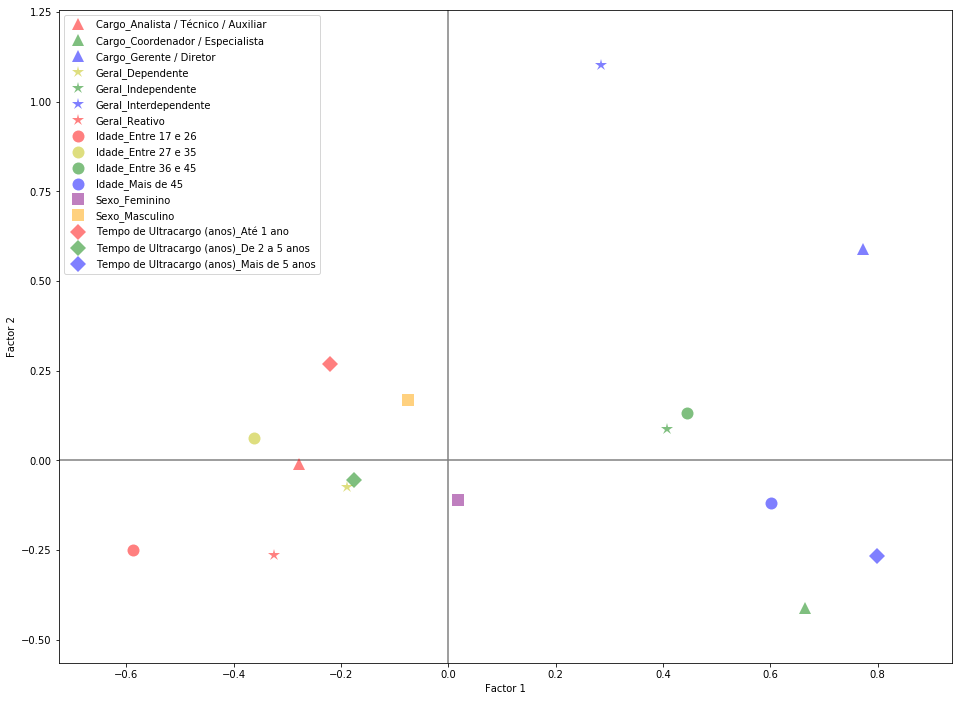

In [22]:
noise = 0.05 * (np.random.rand(*table4.T[fs].shape) - 0.5)
fs_by_source = table4.T[fs].add(noise).groupby(table4.T[fs].index)

fig, ax = plt.subplots(figsize=(16,12))
plt.margins(0.1)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
ax.margins(0.1)
markers = '^', '^', '^', '*', '*', '*', '*', 'o', 'o', 'o', 'o', 's', 's', 'D','D', 'D'
colors = 'r', 'g', 'b', 'y', 'g', 'b', 'r', 'r', 'y', 'g', 'b', 'purple', 'orange', 'r', 'g', 'b',
for fscore, marker, color in zip(fs_by_source, markers, colors):
    label, points = fscore
    ax.plot(*points.T.values, marker=marker, color=color, label=label, linestyle='', alpha=.5, mew=0, ms=12)
ax.legend(numpoints=1, loc='best')
plt.show()